In [4]:
import tensorflow as tf
import numpy as np
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import os
import matplotlib as mpl
import matplotlib.colors as mcolors

In [5]:
enhanced_dir = 'path to evaluation files for my model'
ref_dir = 'path to evaluation files for reference model/'
clean_dir = 'path to clean files'
enhanced_file_list = os.listdir(enhanced_dir)
ref_file_list = os.listdir(ref_dir)
clean_file_list = os.listdir(clean_dir)

In [6]:
i = 100
size = 512
start =  size * i
end = start + size
abs_error_enhanced_time = []
abs_error_ref_time = []
fft_mag_enhanced = []
fft_mag_ref = []
fft_mag_clean = []
abs_error_enhanced_freq = []
abs_error_ref_freq = []

abs_error_enhanced_freq_all = []
abs_error_ref_freq_all = []

abs_error_enhanced_time_all = []
abs_error_ref_time_all = []

for item in enhanced_file_list:
    shared = item[item.find("fileid_"):item.find("wav")]
    print(shared)
    for idx in range(len(clean_file_list)):
        if shared in clean_file_list[idx]:
            audio_enhanced_dir = os.path.join(enhanced_dir, item)
            audio_ref_dir = os.path.join(ref_dir, item)
            audio_clean_dir = os.path.join(clean_dir, clean_file_list[idx])
            
            audio_enhanced, fs = sf.read(audio_enhanced_dir)
            audio_ref, fs = sf.read(audio_ref_dir)
            audio_clean, fs = sf.read(audio_clean_dir)
            for i in range(len(audio_clean)//512):
                fft_mag_enhanced.append(np.fft.rfft(audio_enhanced[size*i:size*(i+1)]))
                fft_mag_ref.append(np.fft.rfft(audio_ref[size*i:size*(i+1)]))
                fft_mag_clean.append(np.fft.rfft(audio_clean[size*i:size*(i+1)]))
                mag_norm = np.abs(np.fft.rfft(audio_clean[size*i:size*(i+1)]))+1e-7
                time_norm = np.abs(audio_clean[size*i:size*(i+1)])+1e-7
                mag_clean = np.abs(np.fft.rfft(audio_clean[size*i:size*(i+1)]))
                mag_enhanced = np.abs(np.fft.rfft(audio_enhanced[size*i:size*(i+1)]))
                mag_ref = np.abs(np.fft.rfft(audio_ref[size*i:size*(i+1)]))
                
                
                
                time_clean = audio_clean[size*i:size*(i+1)]
                time_enhanced = audio_enhanced[size*i:size*(i+1)]
                time_ref = audio_ref[size*i:size*(i+1)]
                       
                abs_error_enhanced_freq.append(np.mean(np.abs(mag_clean - mag_enhanced)))
                abs_error_ref_freq.append(np.mean(np.abs(mag_clean - mag_ref)))

                abs_error_enhanced_freq_all.append(np.abs(mag_clean - mag_enhanced))
                abs_error_ref_freq_all.append(np.abs(mag_clean - mag_ref))
                
                abs_error_enhanced_time.append(np.mean(np.abs(time_clean - time_enhanced)))
                abs_error_ref_time.append(np.mean(np.abs(time_clean - time_ref)))
                
                abs_error_enhanced_time_all.append(np.abs(time_clean - time_enhanced))
                abs_error_ref_time_all.append(np.abs(time_clean - time_ref))
                
                
print(len(abs_error_enhanced_freq_all))
print(len(abs_error_ref_freq_all))

fileid_214.
fileid_59.
fileid_280.
fileid_80.
fileid_2.
fileid_107.
fileid_149.
fileid_199.
fileid_96.
fileid_192.
fileid_67.
fileid_252.
fileid_49.
fileid_181.
fileid_200.
fileid_37.
fileid_275.
fileid_82.
fileid_207.
fileid_147.
fileid_163.
fileid_228.
fileid_53.
fileid_42.
fileid_178.
fileid_285.
fileid_221.
fileid_9.
fileid_175.
fileid_116.
fileid_142.
fileid_50.
fileid_63.
fileid_249.
fileid_94.
fileid_104.
fileid_125.
fileid_33.
fileid_167.
fileid_26.
fileid_283.
fileid_112.
fileid_66.
fileid_161.
fileid_118.
fileid_127.
fileid_191.
fileid_35.
fileid_245.
fileid_89.
fileid_291.
fileid_73.
fileid_110.
fileid_57.
fileid_101.
fileid_146.
fileid_81.
fileid_231.
fileid_145.
fileid_223.
fileid_261.
fileid_5.
fileid_288.
fileid_38.
fileid_296.
fileid_134.
fileid_250.
fileid_169.
fileid_4.
fileid_43.
fileid_117.
fileid_54.
fileid_90.
fileid_34.
fileid_293.
fileid_105.
fileid_234.
fileid_132.
fileid_268.
fileid_69.
fileid_44.
fileid_289.
fileid_229.
fileid_218.
fileid_52.
fileid_243.
file

In [7]:
#setting for matplotlib
a_value=0.2
marker_size=5

std of abs_error_enhanced_time_all :0.00873
mean of abs_error_enhanced_time_all :0.00476
std of abs_error_ref_time_all :0.01005
mean of abs_error_ref_time_all :0.00531
std of abs_error_enhanced_freq_all :0.17026
mean of abs_error_enhanced_freq_all :0.04452
std of abs_error_ref_freq_all :0.22436
mean of abs_error_ref_freq_all :0.05022


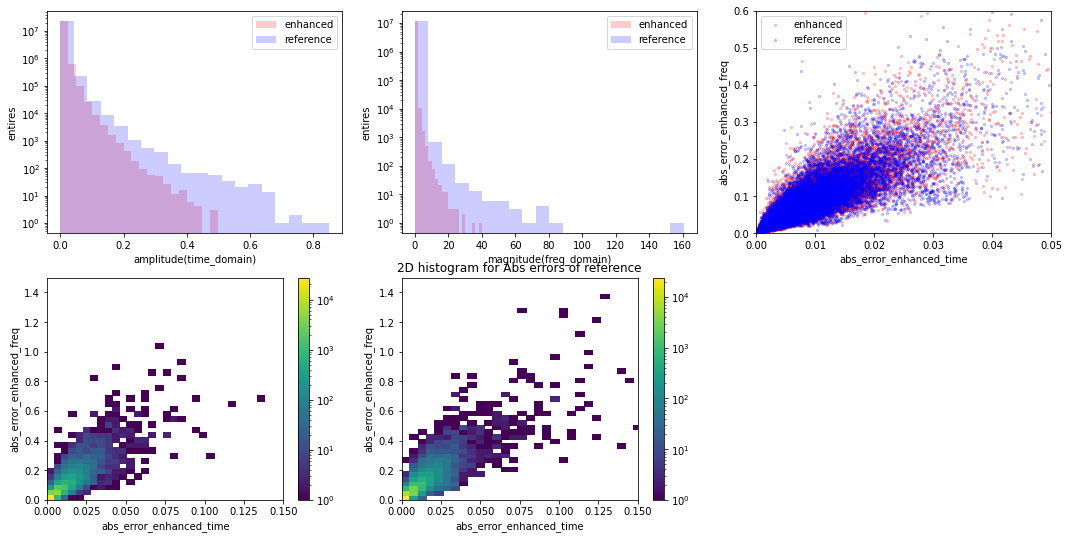

In [8]:
print("std of abs_error_enhanced_time_all :{}".format(np.round(np.std(abs_error_enhanced_time_all), 5)))
print("mean of abs_error_enhanced_time_all :{}".format(np.round(np.mean(abs_error_enhanced_time_all), 5)))
print("std of abs_error_ref_time_all :{}".format(np.round(np.std(abs_error_ref_time_all),5)))
print("mean of abs_error_ref_time_all :{}".format(np.round(np.mean(abs_error_ref_time_all),5)))

print("std of abs_error_enhanced_freq_all :{}".format(np.round(np.std(abs_error_enhanced_freq_all),5)))
print("mean of abs_error_enhanced_freq_all :{}".format(np.round(np.mean(abs_error_enhanced_freq_all),5)))
print("std of abs_error_ref_freq_all :{}".format(np.round(np.std(abs_error_ref_freq_all),5)))
print("mean of abs_error_ref_freq_all :{}".format(np.round(np.mean(abs_error_ref_freq_all),5)))

plt.figure(figsize=(18, 9))
plt.subplot(2,3,1)
plt.hist(np.reshape(abs_error_enhanced_time_all, (-1)), color='r', bins=20, log=True, alpha=a_value, label='enhanced')
plt.hist(np.reshape(abs_error_ref_time_all, (-1)), color='b', bins=20, log=True, alpha=a_value, label='reference')
#plt.plot(abs_enhanced, 'b', label='abs error for clean - enhanced_full_sisdr_5', linewidth=width, alpha=a_value)
#plt.title('clean vs ref_full vs sisdr5')
plt.xlabel('amplitude(time_domain)')
plt.ylabel('entires')
plt.legend()

plt.subplot(2,3,2)
plt.hist(np.reshape(abs_error_enhanced_freq_all, (-1)), color='r', bins=20, log=True, alpha=a_value, label='enhanced')
plt.hist(np.reshape(abs_error_ref_freq_all, (-1)), color='b', bins=20, log=True, alpha=a_value, label='reference')
plt.xlabel('magnitude(freq_domain)')
plt.ylabel('entires')
plt.legend()


plt.subplot(2,3,3)
plt.scatter(np.reshape(abs_error_enhanced_time, (-1)), np.reshape(abs_error_enhanced_freq, (-1)), color='r', alpha=a_value, s=marker_size, label='enhanced')
plt.scatter(np.reshape(abs_error_ref_time, (-1)), np.reshape(abs_error_ref_freq, (-1)), color='b', alpha=a_value, s=marker_size, label='reference')
plt.xlim([0,0.05])
plt.ylim([0,0.6])
plt.xlabel('abs_error_enhanced_time')
plt.ylabel('abs_error_enhanced_freq')
plt.legend()

plt.subplot(2,3,4)
plt.hist2d(np.reshape(abs_error_enhanced_time, (-1)), np.reshape(abs_error_enhanced_freq, (-1)), norm=mpl.colors.LogNorm(), bins=30)
plt.colorbar()
plt.xlim([0,0.15])
plt.ylim([0,1.5])
plt.xlabel('abs_error_enhanced_time')
plt.ylabel('abs_error_enhanced_freq')

plt.subplot(2,3,5)
plt.hist2d(np.reshape(abs_error_ref_time, (-1)), np.reshape(abs_error_ref_freq, (-1)), norm=mpl.colors.LogNorm(), bins=60)
plt.colorbar()
plt.xlim([0,0.15])
plt.ylim([0,1.5])
plt.title('2D histogram for Abs errors of reference')
plt.xlabel('abs_error_enhanced_time')
plt.ylabel('abs_error_enhanced_freq')

plt.show()